12.2 million people all at risk for malaria
100% risk for malaria

probability of transmission 32% or 78% from those with >1000 sporozoites

7-18 day incubation period

no particular immunity

# Step 4

In [6]:
%matplotlib inline
import pandas as pd
from plotnine import *
import numpy as np

In [7]:
POP = 12200000
I = 1
S = POP - I
R = 0

pop_mos = 12000000
inf_mos = 50
s_mos = pop_mos - inf_mos


num_contacts = 3
prob_trans = 0.33
duration = 13
immunity = 1

beta = num_contacts * prob_trans / POP
gamma = 1 / duration
alpha = 1 / immunity

sim_length = 1825

r_0 = beta / gamma
r_0

1.0549180327868852e-06

In [8]:
import math
def bt(t):
    return beta * (1 - math.cos(25 * math.radians(t)))

In [9]:
def SIR(u, t):
    S, I, R, I_mos, S_mos = u
    dS = -bt(t) * I * S + alpha * R
    dI = bt(t) * I * S - gamma * I
    dR = gamma * I - alpha * R
    return np.array([dS, dI, dR, I_mos, S_mos])

In [10]:
def rk4(func, initial, deltas):
    ys = [initial]
    for i in range(1, len(xs)):
        old = np.array(ys[-1][:])
        dt = xs[i] - xs[i - 1]
        d1 = np.array(func(old, xs[i])) * dt
        d2 = np.array(func(old + 0.5 * d1, xs[i] + 0.5 * dt)) * dt
        d3 = np.array(func(old + 0.5 * d2, xs[i] + 0.5 * dt)) * dt
        d4 = np.array(func(old + d3, xs[i] + dt)) * dt
        better = old + ((d1 + 2 * d2 + 2 * d3 + d4) / 6.0)
        ys.append(better)
    return np.array(ys)

In [11]:
xs = np.linspace(0, sim_length, sim_length * 300)
ys = rk4(SIR, [S, I, R, inf_mos, s_mos], xs)

<ipython-input-10-cc66c0e64df7>:7: RuntimeWarning: overflow encountered in add
<ipython-input-10-cc66c0e64df7>:9: RuntimeWarning: overflow encountered in add


In [14]:
df = pd.DataFrame(ys, columns=["Susceptible", "Infected", "Recovered", "I_mos", "S_mos"])
df["Time"] = xs

In [15]:
dfmelt=pd.melt(df, id_vars=['Time'], value_vars=["Susceptible", "Infected", "Recovered"], var_name='Categories', value_name='Population')
dfmelt

,Time,Categories,Population
0,0.000000,Susceptible,1.220000e+07
1,0.003333,Susceptible,1.220000e+07
2,0.006667,Susceptible,1.220000e+07
3,0.010000,Susceptible,1.220000e+07
4,0.013333,Susceptible,1.220000e+07
...,...,...,...
1642495,1824.986667,Recovered,8.288635e+05
1642496,1824.990000,Recovered,8.288388e+05
1642497,1824.993333,Recovered,8.288141e+05
1642498,1824.996667,Recovered,8.287893e+05


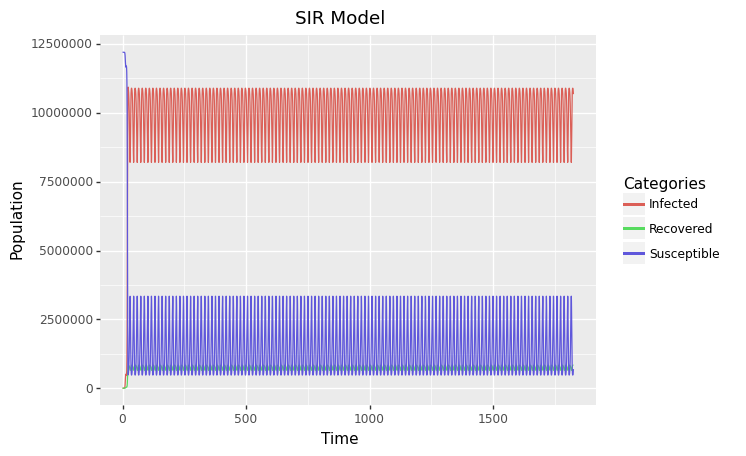

<ggplot: (169101765792)>

In [16]:
ggplot(dfmelt, aes(x="Time", y="Population", color="Categories")) \
+ geom_line() \
+ labs(title="SIR Model")

# Step 5

In [235]:
POP = 12200000
I = 1
S = POP - I
R = 0

rainy = True
num_contacts = 3
prob_trans = 0.33
duration = 13
immunity = 1

beta = num_contacts * prob_trans / POP
gamma = 1 / duration
alpha = 1 / immunity

sim_length = 60

r_0 = beta / gamma
r_0

1.0549180327868852e-06

In [236]:
import math
def bt2(t):
    if(t%3 == 0):
        beta = (num_contacts*20) * prob_trans / POP
    else:
        beta = num_contacts * prob_trans / POP
    return beta * (1 - math.cos(25 * math.radians(t)))

In [237]:
def SIR2(u, t):
    S, I, R = u
    dS = -bt2(t) * I * S + alpha * R
    dI = bt2(t) * I * S - gamma * I
    dR = gamma * I - alpha * R
    return np.array([dS, dI, dR])

In [238]:
xs = np.linspace(0, sim_length, sim_length * 300)
ys = rk4(SIR2, [S, I, R], xs)

In [239]:
df = pd.DataFrame(ys, columns=["Susceptible", "Infected", "Recovered"])
df["Time"] = xs

In [240]:
dfmelt=pd.melt(df, id_vars=['Time'], value_vars=["Susceptible", "Infected", "Recovered"], var_name='Categories', value_name='Population')
dfmelt

,Time,Categories,Population
0,0.000000,Susceptible,1.220000e+07
1,0.003334,Susceptible,1.220000e+07
2,0.006667,Susceptible,1.220000e+07
3,0.010001,Susceptible,1.220000e+07
4,0.013334,Susceptible,1.220000e+07
...,...,...,...
53995,59.986666,Recovered,6.484040e+05
53996,59.989999,Recovered,6.483799e+05
53997,59.993333,Recovered,6.483563e+05
53998,59.996666,Recovered,6.483331e+05


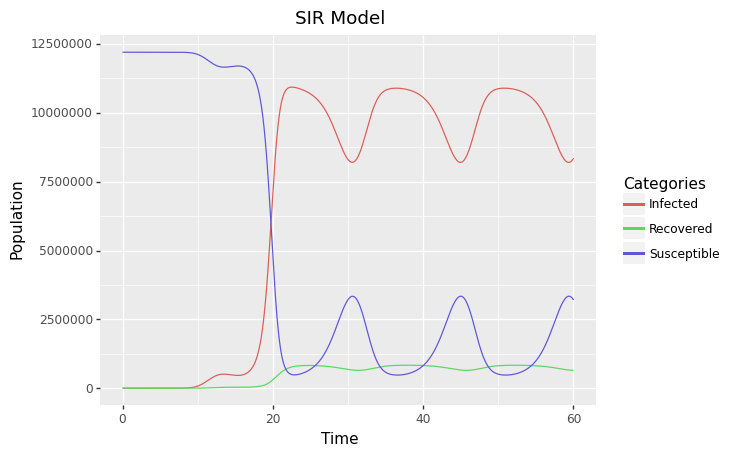

<ggplot: (107106704309)>

In [241]:
ggplot(dfmelt, aes(x="Time", y="Population", color="Categories")) \
+ geom_line() \
+ labs(title="SIR Model")